In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

%load_ext autoreload
%autoreload 2

In [6]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

Eliminating 147 point due to beta with average 0.9592 loops.


# Plot the worst delays to

<IPython.core.display.Javascript object>


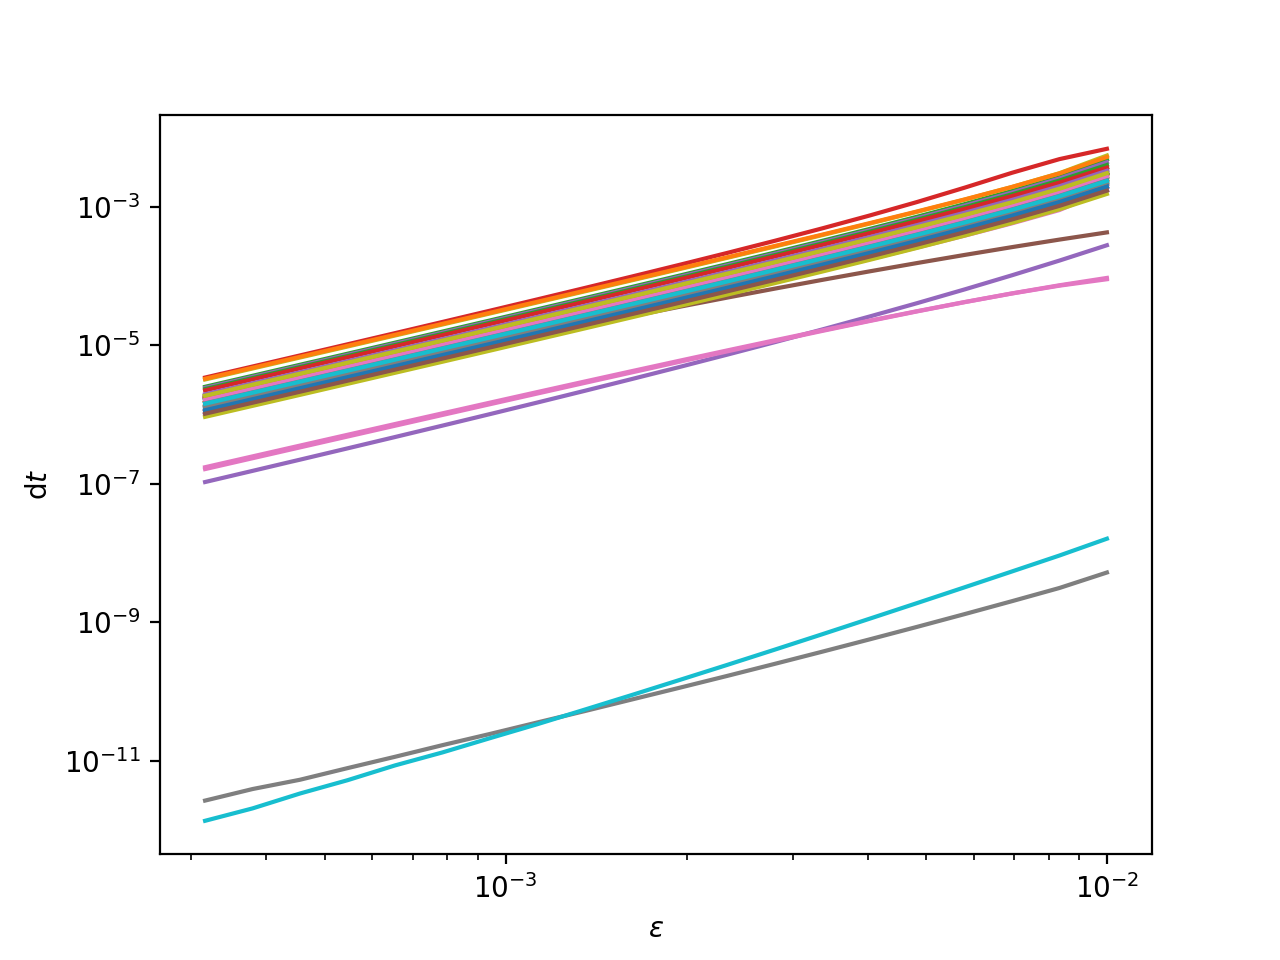

In [7]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]

snr = betas[:, 1] / betas[:, 0]
notnans = ~np.isnan(snr)
Nworst = 50

plt.figure()
for k in np.argsort(snr[notnans])[::-1][:Nworst]:
    dt = np.abs(Xgshe[notnans, ...][k, :, 2] - Xgeo[notnans, ...][k, 2])
    plt.plot(eps, dt)
    
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\mathrm{d}t$")
# plt.savefig("/Users/richard/Downloads/dt.png")
plt.show()

# Summary Plots

In [8]:
grid = data["grid"]
alphas = data["alphas"]
betas = data["betas"]

hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=200)
vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)

## BH Shadow

<IPython.core.display.Javascript object>


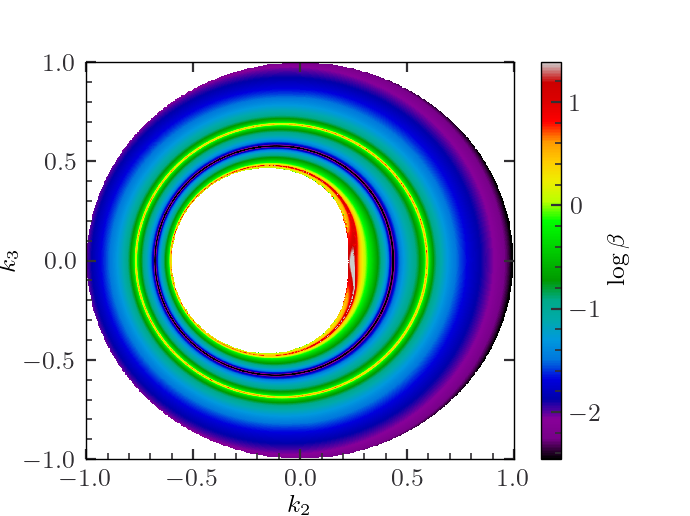

In [11]:
X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(vals), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles

GSHEWaveform.setmplstyle("../plot_style.txt")

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\log \beta$")
ax.set_xlabel("$k_2$")
ax.set_ylabel("$k_3$")
plt.savefig("/Users/richard/Downloads/shadow_beta.pdf", dpi=600, bbox_inches="tight")
fig.show()

## $\Upsilon$ plot

/Users/richard/Projects/birefringence/paper_plots/../GSHEWaveform/shadow.py:64: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))


<IPython.core.display.Javascript object>


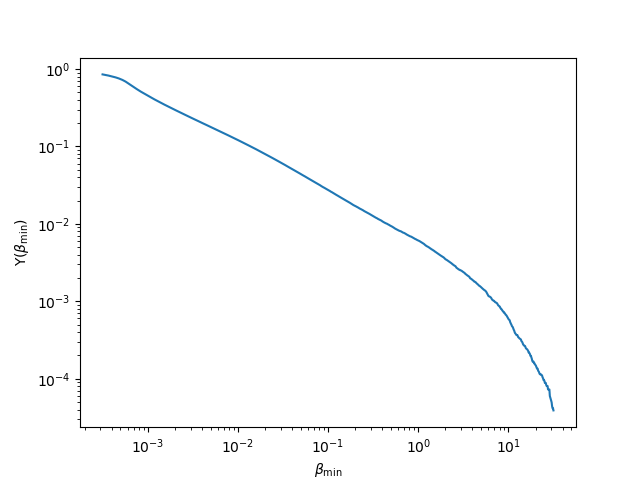

In [6]:
betalims = np.logspace(-3.5, 1.5, 1000)
dk = data["xs"][1] - data["xs"][0]

upsilons = GSHEWaveform.get_upsilon(grid, vals, betalims, dk)


plt.figure()
plt.plot(betalims, upsilons)

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")

# plt.savefig("/Users/richard/Downloads/test.png")
plt.show()